In [ ]:
from sklearn.datasets import fetch_california_housing
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.regressionplots import abline_plot
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
from scipy.stats import pearsonr

cal_data = fetch_california_housing()

In [ ]:
#prints metadata about california housing dataset (1990)
print(cal_data.DESCR)
print(cal_data.keys())
print(cal_data.feature_names)
print(cal_data.data.shape)
print(cal_data.target.shape)

In [ ]:
cal_df = pd.DataFrame(
    data=cal_data.data,
    columns=cal_data.feature_names
)
cal_df['MedHouseVal'] = cal_data['target']

In [ ]:
cal_df.head()

In [ ]:
num_observations = cal_df.count(axis='rows') #counts number of rows which represents samples
num_variables = len(cal_df.columns) #counts number of columns which represents variables
data_types = cal_df.dtypes #returns data types of each column
null_values = cal_df.isna().sum() #counts number of null values for each observation

print("Number of observations:")
print(num_observations)

print("\nNumber of variables:")
print(num_variables)

print("\nData type for each variable:")
print(data_types)

print("\nNumber of missing values for each variable:")
null_values

In [ ]:
#various surface level statistics in the dataset

avg_pop = cal_df['Population'].mean() #average population per block group
total_pop = cal_df['Population'].sum() #total population
min_pop = cal_df[cal_df.Population == cal_df.Population.min()]
max_pop = cal_df[cal_df.Population == cal_df.Population.max()]
westofberkeley_blocks = len(cal_df[cal_df.Longitude < -122.272781])
households_over_10 = len(cal_df[cal_df.AveOccup >= 10])

print("Average Population: ", avg_pop)
print("Total population: ", total_pop)
print("Minimum population house value: ", min_pop.MedHouseVal.item())
print("Maximum population house value: ", max_pop.MedHouseVal.item())
print("Number of blocks west of Berkeley (Longitude: -122.272781): ", westofberkeley_blocks)
print("Approx. Blocks with average occupancy >10: ", 
    format(households_over_10/len(cal_df), ".2%"))

resorts = cal_df.sort_values(['AveRooms', 'MedInc'], ascending=[False, False]).head(5)
resorts

In [ ]:
#prints a summary of statistics for the dataset

summary_stats = cal_df.describe().transpose()
options = ['count', 'mean', 'std', 'min', '50%', 'max']

summary_stats[options]

In [ ]:
plt.rcParams['figure.figsize'] = [7,5]

X = cal_df['Population']
Y = cal_df['MedHouseVal']

#plot data using seaborn
sns.regplot(x=X, y=Y, data=Population_MedHouseVal_Data, 
            scatter=True, ci=False, fit_reg=True, 
            line_kws={'color':'red'})

plt.title('Population vs. MedHouseVal')
plt.show()

#data for model
Population_MedHouseVal_Data = cal_df[['Population', 'MedHouseVal']]

#create model for data using statsmodels OLS
Population_MedHouseVal_Model = ols("MedHouseVal ~ Population", 
                                data=Population_MedHouseVal_Data).fit()

#show summay of OLS using statsmodels
print(Population_MedHouseVal_Model.summary())

#calculate pearson's correlation for Population/MedHouseVal
pop_val_corr, _ = pearsonr(cal_df['Population'], cal_df['MedHouseVal'])
print('\nPearsons correlation: %.3f' % pop_val_corr)

In [ ]:
#display histogram for Number of Blocks by MedHouseVal

rcParams['patch.force_edgecolor']=True

plt.hist(cal_df['MedHouseVal'], bins=100, color='green')

plt.xlabel('MedHouseValue ($100,000s)')
plt.ylabel('Blocks')
plt.title('Number of Blocks by MedHouseVal')

plt.show()

In [ ]:
#display histogram of Log(Average Occupancy) by number of blocks

AveOccup_log = np.log(cal_df['AveOccup'])
AveOccup_mean = np.log(cal_df['AveOccup'].mean())
AveOccup_median = np.log(cal_df['AveOccup'].median())

plt.hist(AveOccup_log, bins=100, color='green')
mean_line = plt.axvline(AveOccup_mean, color='r', linestyle='--', label='Mean')
median_line = plt.axvline(AveOccup_median, color='blue', linestyle='--', label='Median')

plt.title('Average Occupancy')
plt.xlabel('Log(AveOccup)')
plt.ylabel('Number of Blocks')

plt.legend()
plt.show()

In [ ]:
#display a correlation matrix for variables in the dataset
plt.rcParams['figure.figsize'] = [10,10]

cal_df_corr_matrix = cal_df.corr()
variables = []

for i in cal_df_corr_matrix.columns:
    variables.append(i)

colors = [(1,0,0), (1,1,1), (0,1,0)]
cm = LinearSegmentedColormap.from_list("Custom", colors, N=16)

plt.imshow(cal_df_corr_matrix, cmap=cm)
plt.colorbar()
plt.xticks(range(len(cal_df_corr_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(cal_df_corr_matrix)), variables)
plt.title('California Housing Correlation Matrix\n\n')

plt.show()

print(cal_df_corr_matrix)

In [ ]:
#variable for generating heatmap
def california_heatmap(variable):
    variable = 'MedHouseVal'

    #dictionary for plotting major cities
    cal_cities = {
        "Los Angeles":   [34.052, -118.243],
        "San Diego":     [32.716, -117.165],
        "San Jose":      [37.339, -121.895],
        "San Francisco": [37.775, -122.419],
        "Fresno":        [36.748, -119.772],
        "Sacramento":    [38.582, -121.494],
        "Bakersfield":   [35.373, -119.019],
        "Anaheim":       [33.835, -117.915],
        "Lake Tahoe":    [39.097, -120.032],
        "Eureka":        [40.802, -124.164],
        "Morro Bay":     [35.366, -120.850],
        "Santa Barbara": [34.421, -119.698],
        "Redding":       [40.587, -122.392],
        "Monterey":      [36.600, -121.895]
        }

    #sets graph dimensions to match Latitude/Longitude bounds
    width = cal_df['Latitude'].max()-cal_df['Latitude'].min()
    height = cal_df['Longitude'].max()-cal_df['Longitude'].min()
    plt.rcParams['figure.figsize'] = [width,height]

    #creates color gradient for change in variable
    colors = [(1,0,0),(1,1,0), (0,1,0)]
    cm = LinearSegmentedColormap.from_list("Custom", colors, N=100)

    #plot each observation according to Lat/Long and set its color according to variable value
    X = cal_df['Longitude']
    Y = cal_df['Latitude']
    value = cal_df[variable]
    plt.scatter(X, Y, c=value, cmap=cm, s=1)

    #add color bar
    cbar = plt.colorbar()
    cbar.set_label(variable, rotation=270)

    #plot each values in city dictionary
    for city, coordinate in cal_cities.items():
        plt.scatter(coordinate[1], coordinate[0], c='black', marker='*')
        plt.text(coordinate[1], coordinate[0]+.08, city)
    
    #set axis lables and title
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('California ' + variable + ' Heatmap')

    return(plt.show())

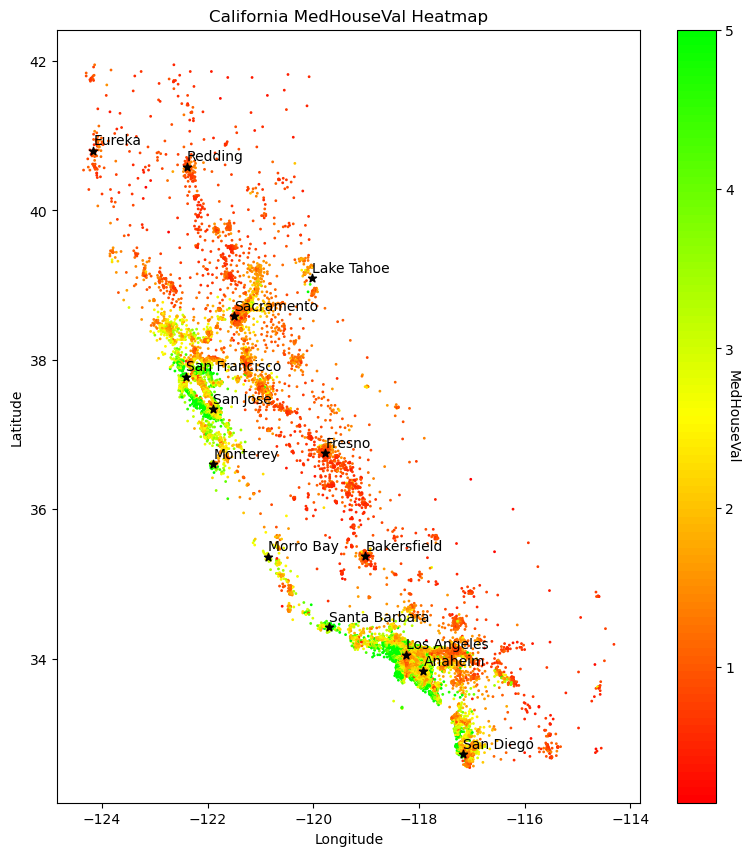

In [56]:
california_heatmap('MedHouseVal')

In [ ]:
#Bay Area Heatmap
def bay_area_heatmap(variable):
    
    #dictionary for notable cities in the bay area
    bay_cities = {
        "San Francisco": [37.775, -122.419],
        "Oakland":       [37.8044, -122.271],
        "Fremont":       [37.549, -121.989],
        "San Jose":      [37.339, -121.885],
        "Sacramento":    [38.582, -121.494],
        "Palo Alto":     [37.442, -122.143],
        "Santa Rosa":    [38.440, -122.714],
        "Richmond":      [37.936, -122.348],
        "Santa Cruz":    [36.974, -122.031],
        "Stockton":      [37.958, -121.291],
        "Vallejo":       [38.104, -122.257],
        "Concord":       [37.978, -122.031],
        "Pleasanton":    [37.660, -121.876],
        "Fairfield":     [38.249, -122.041],
        "Davis":         [38.545, -121.741],
        "Vacaville":     [38.357, -121.988],
        "San Mateo":     [37.563, -122.326]
        }

    #bound blocks in dataframe to plot based on coordinates
    bay_x = -122.291
    bay_y = 37.827
    
    min_x_plot = bay_x - 1
    max_x_plot = bay_x + 1
    min_y_plot = bay_y - 1
    max_y_plot = bay_y + 1
    
    blocks = cal_df[(cal_df['Longitude'] > min_x_plot) & (cal_df['Longitude'] < max_x_plot) & 
                    (cal_df['Latitude'] > min_y_plot) & (cal_df['Latitude'] < max_y_plot)]

    X = blocks['Longitude']
    Y = blocks['Latitude']

    #set figure size to match dimensions of Long/Lat bounds
    width = blocks['Latitude'].max()-blocks['Latitude'].min()
    height = blocks['Longitude'].max()-blocks['Longitude'].min()
    plt.rcParams['figure.figsize'] = [width*5,height*5]

    #set gradient color
    if variable == 'HouseAge':
        colors = [(0,1,0), (1,1,0), (1,0,0)]
    else:
        colors = [(1,0,0),(1,1,0), (0,1,0)]
    cm = LinearSegmentedColormap.from_list("Custom", colors, N=15)

    #plot blocks and give them gradient color according to variable
    value = blocks[variable]
    plt.scatter(X, Y, c=value, cmap=cm, s=2)

    #add color bar
    cbar = plt.colorbar()
    
    #set label for colorbar
    if   variable == 'MedInc':
         cbar.set_label(variable+" ($1,000s)", rotation=270, labelpad=20)
    elif variable == 'HouseAge':
        cbar.set_label(variable+" (years)", rotation=270, labelpad=20)
    elif variable == 'MedHouseVal':
        cbar.set_label(variable+" ($100,000s)", rotation=270, labelpad=20)
    else:
        cbar.set_label(variable, rotation=270, labelpad=20)
        
    #plot cities from city dictionary
    for city, coordinate in bay_cities.items():
        plt.scatter(coordinate[1], coordinate[0], c='black', marker="*", s=50)
        plt.text(coordinate[1], coordinate[0]-.05, city)

    #add graph labels and title
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Bay Area ' + variable + ' Heatmap')
    
    #return graph
    return(plt.show())

In [ ]:
bay_area_heatmap('MedInc')

In [ ]:
bay_area_heatmap('MedHouseVal')

In [ ]:
bay_area_heatmap('HouseAge')